# Machine Learning in Python - Project 1


Gregoris Georgiou, Antonis Hadjiosif, Yasmin Hengster & Eshan Ratnaweera

In [ ]:
!jupyter nbconvert --to html --no-input /content/proje.ipynb 

[NbConvertApp] Converting notebook /content/proje.ipynb to html
[NbConvertApp] Writing 1742358 bytes to /content/proje.html


**`office_csv`**

* `season` - Season number of the episode
* `episode` - Episode number within a season
* `episode_name` - Episode name
* `director` - Episode director(s), names are separated by `;`
* `writer` - Episode writer(s), names are separated by `;`
* `imdb_rating` - Episode rating on IMDB
* `total_votes` - Number of ratings for episode on IMDB
* `air_date` - Original air date of episode
* `n_lines` - Number of spoken lines in episode
* `n_directions` - Number of lines containing a stage direction
* `n_words` - Number of dialog words in episide
* `n_speak_char` - Number of different characters with spoken lines in episode
* `main_chars` - Main characters appearing in episode (main characters were determined to be characters appearing in more than 1/2 of the episodes)

In [ ]:
#Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

#sklearn modules
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/mlp/projects/1')
!ls

Mounted at /content/drive
cold_opens.csv	project1.ipynb	project1.zip  README.md  the_office.csv


In [ ]:
#Load data
d = pd.read_csv("the_office.csv")
openings = pd.read_csv("cold_opens.csv")
d['cold_opens'] = openings['cold_opens']

#**Executive Summary**
Over the last few years, there have been many reunion shows which have aired. Prominent franchises have produced their own versions, whereby main characters were brought together to recapture the best moments and memories. This report focuses on “The Office US” and the use of Machine Learning methods to help NBC Universal with the creation of a special reunion episode. The show currently has an IMDb rating of 9.0 *(Source: https://www.imdb.com/title/tt0386676/ratings/?ref_=tt_ov_rt)* , highlighting its popular reputation with viewers.
“The Office US: Reunion Show” which is currently being deliberated should aim to get the highest possible rating by drawing on the best features of the show. We analysed the choices of directors, writers and main characters. For directors and writers we recommend a selection to choose from. Our research found the selections below were the best choices in having the most positive and highly influential impact on ratings:

* Directors
  * Tucker Gates 
  * Harold Ramis
* Writers
  * Mindy Kaling
  * B.J. Novak
  * Lee Eisenberg

We also analyzed some numerical features including the number of lines, stage directions and speaking characters and a special categorical feature indicating if the episode includes a cold opening. Some of these variables had an effect on the episodes’ ratings but was insignificant compared to the effect writers, directos and main characters had on the ratings. Thus, it was decided that it’s better if these numerical features are left on the discretion of the chosen writer(s) and director(s). We believe that they should be given the freedom to produce the reunion show in their own style, as this would lead to the highest rating. 
For the main characters, we provide the following selection:
  * Dwight
  * Jim
  * Michael
  * Pam
  * Ryan
 
The chosen 5 characters we suggest as being definite inclusions to the show. We suggest that Andy, Angela, Creed, Kelly, Oscar and Toby will also have a positive impact on the rating, however, their influence is not as significant. We found that Kevin, Stanley, Meredith, Erin and Phyllis had a negative impact with a comparably higher influence on the ratings of the show. We would advise against their inclusion. We appreciate that the storyline of the reunion may require certain characters to complete the show, therefore, the writer and director will be given the final decision. Through our report we will aim to provide insight on what features led to "The Office US" attain such a high rating.



#**1. Introduction**

In this report we will set out our recommendations on how to produce a reunion show of “The Office US” through machine learning models to attain the best possible rating. The dataset used included varying features from directors to the number of speaking characters of every episode. The data set **`the_office.csv`** *(Source: https://pypi.org/project/schrutepy/)* containes the following variables: 
* `season` - season number of the episode
* `episode` - episode number within the season
* `episode_name` - episode name
* `director` - episode director(s)
* `writer` - episode writer(s)
* `imdb_rating` - episode rating on IMDd
* `total_votes` - number of ratings for episode on IMDd
* `air_date` - original air date of episode
* `n_lines` - number of spoken lines in episode
* `n_directions` - number of lines containing a stage direction where a character is facing the camera
* `n_words` - number of dialog words in episide
* `n_speak_char` - number of different characters with spoken lines in episode
* `main_chars` - main characters appearing in episode (main characters were determined to be characters appearing in more than 1/2 of the episodes) 

The IMDb rating column shows the average rating submitted by IMDb users for every episode. The rating takes the range from 1-10, where 10 is the highest rated value.

The style of the opening scene was an additional feature we chose to explore. Cold opens jump directly to the plot of a show rather than going straight into the title sequence *(Source: https://www.masterclass.com/articles/what-is-a-cold-open)*. This may be a popular feature of the show which could serve well in improving the ratings from viewers *(Source: https://theoffice.fandom.com/wiki/List_of_Cold_Opens)*.
 
We explored various regression models of machine learning processes in our research to determine the impact of features on ratings. We utilised linear regression methods to determine whether features had a positive or negative effect. Ridge regression then provided insight to the “influence” of features on the rating. This facilitated our recommendations of a set of writers, directors and main characters which would lead to a higher rating.


## **2. Exploratory Data Analysis and Feature Engineering**

### **2.1 Pre-processing**
Our initial work on the data included summarising descriptive statistics which would help remove any features or observations without a predictive behaviour on the average IMDb rating. The data was checked for duplicates and missing values, which it was free from. Cold opens were added as a categorical variable. This indicated whether the opening sequence of an episode included a cold open. The features which were initially removed are:
* `season`
* `episode`
* `air_date`
* `episode_name`
* `total_votes`

The rationale for dropping the features `total_votes` and `episode_name` would be that both would not help identify insights on the average rating of episodes as each episode is unique and the number of total votes does not directly contribute to an episode's rating.
 
We acknowledged that the chronological order of the episodes may affect their ratings over time. One of the main protagonists of the show, Michael, was not involved in the final two seasons of the show. This may have impacted ratings over time. However, it didn't make sense to account for time as the reunion show would be a one-off occurrence. The figure below shows there was little variation between average ratings throughout the seasons. For the last two seasons we can see a small decrease in the rating, potentially correlated to Micheal's absence from the show.

Text(0, 0.5, 'IMDb Average Rating')

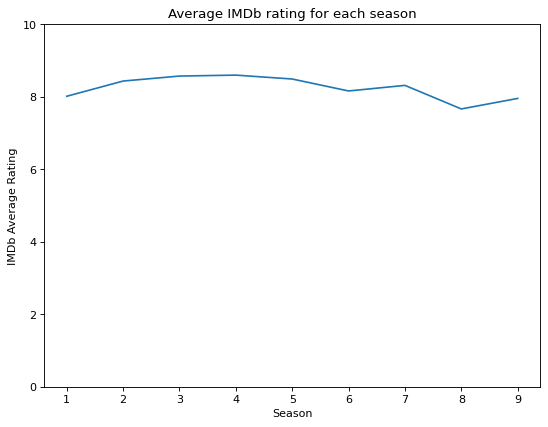

In [ ]:
#@title Average rating of the seasons
d.duplicated().sum()
np.sum(pd.isnull(d))

import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
seasons = [1]
avgrating = [0]
for i in range(1,10):
  seasons.append(i)
  d1 = d.loc[d['season'] == i]
  avgrating.append(d1['imdb_rating'].mean())

plt.plot(seasons[1:],avgrating[1:])
plt.ylim(0,10)
plt.title("Average IMDb rating for each season")
plt.xlabel("Season")
plt.ylabel("IMDb Average Rating")

###**2.2 Descriptive Statistics**
####**2.2.1 Histograms**
We produced histograms on the continuous features and these indicate unimodal distributions. The first two features `n_lines` and `n_speak_char` appear to be normally distributed. On the other hand, `n_directions` is positively skewed and `n_words` is negatively skewed.


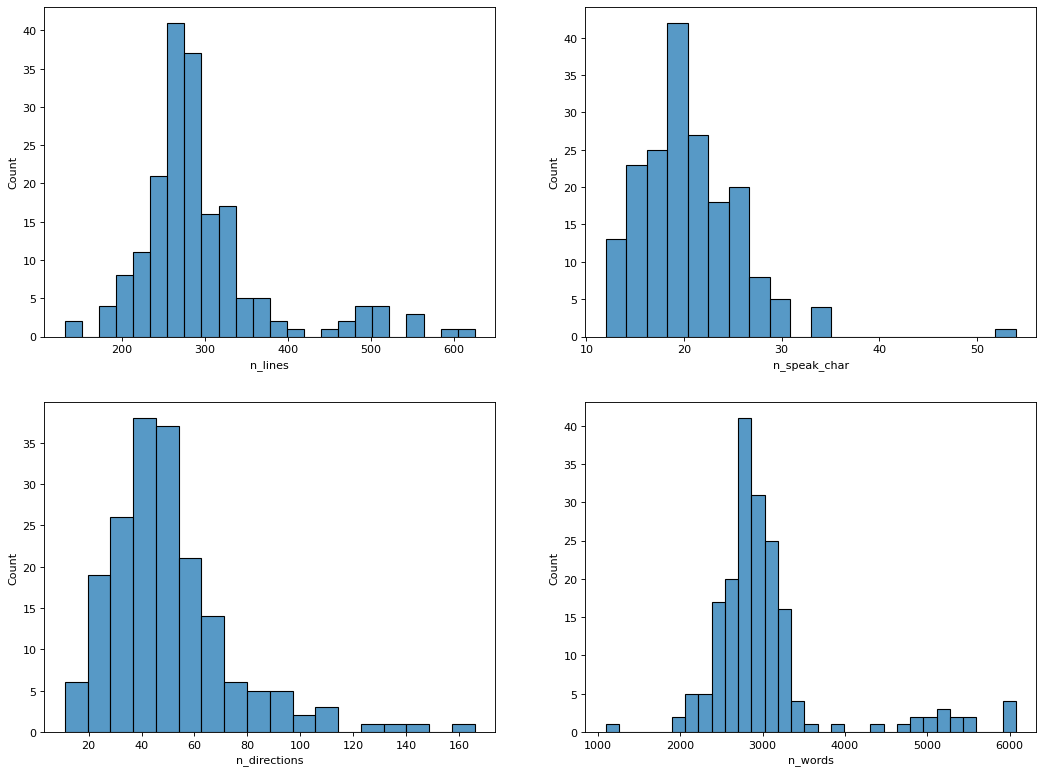

In [ ]:
#@title Histograms
# histograms for n_lines, n_directions, n_words & n_speak_char
num_data = ['n_lines','n_directions','n_words','n_speak_char']
fig, axs = plt.subplots(2, 2, figsize = (16,12))
r = 0
c = 0
for i in num_data:
  sns.histplot(x = d[i], ax = axs[r,c])
  if r>= 1:
     c += 1
  else:
    r += 1
  if c == 2 and r == 1:
    r = 0
    c = 1

####**2.2.2 Correlation**
We then explored the correlation between the numerical features, which are:
* `n_lines`
* `n_directions`
* `n_speak_char`
* `n_words`

The heatmap below shows that there is a very high positive correlation between `n_words` and `n_lines` (~0.92). We chose to drop the feature `n_words` from our dataset as the number of words is a very specific amount and would not be easy to implement in practice. Whereas, `n_lines` was included as it provides some insight into the dialogue the reunion show should adopt.

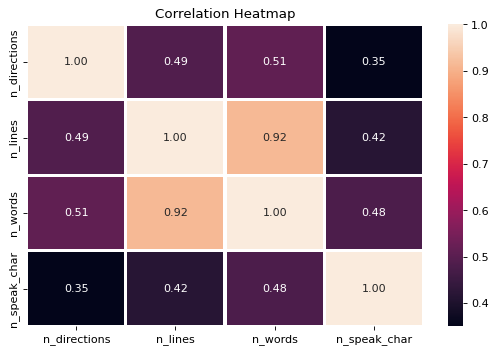

In [ ]:
#@title Correlation
# correlation heatmap of numerical variables

sns.heatmap(d[['n_directions','n_lines','n_words','n_speak_char']].corr(), annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

###**2.3 Processing**
####**2.3.1 One-hot encoding**
The categorical features `director`, `writer` and `main_chars` needed special treatment to be used in our modelling. We utilised one-hot encoding for this purpose. For example, the `director` column where we have created multiple columns, one for each director. We assigned '1' if the individual directed that specific episode or '0' if not. We found  that some director names had some minor spelling errors in the dataset, where there were two columns referring to the same person. We resolved this by identifying such occurences by observation. We then merged the specific columns.

From the list of directors and writers, there were some indiviuals who were both directors and writers. We added `_d` at the end of director's name and `_w` to indicate for writers to be easily identified. 


In [ ]:
# one-hot encoding

d_new = d.copy()

# one-hot for directors
directors = np.unique(';'.join(d['director']).split(';'))
directors = list(map(lambda orig_string: orig_string + '_d', directors))
for dir in directors:
    d_new[dir] = np.zeros(186)
    for i in range(186):
      if dir.replace("_d","") in d_new['director'][i]:
        d_new[dir][i] = 1

# one-hot for writers
writers = np.unique(';'.join(d['writer']).split(';'))
writers = list(map(lambda orig_string: orig_string + '_w', writers))
for w in writers:
    d_new[w] = np.zeros(186)
    for i in range(186):
      if w.replace("_w","") in d_new['writer'][i]:
        d_new[w][i] = 1

# one-hot for main characters
main_characters = np.unique(';'.join(d['main_chars']).split(';'))
for char in main_characters:
    d_new[char] = np.zeros(186)
    for i in range(186):
      if char in d_new['main_chars'][i]:
        d_new[char][i] = 1


# by inspection there is 2 different names for the same name for,correct_name(incorrect_name),
# Charles McDougall(Charles McDougal),Claire Scanlon(Claire Scanlong),Greg Daniels(Greg Daneils), Ken Whittingham(Ken Wittingham), Paul Lieberstein(Paul Lieerstein)

directors_corrected = directors.copy()
directors_corrected.remove('Charles McDougal_d')
directors_corrected.remove('Claire Scanlong_d')
directors_corrected.remove('Greg Daneils_d')
directors_corrected.remove( 'Ken Wittingham_d')
directors_corrected.remove('Paul Lieerstein_d')

correct = ['Charles McDougall_d','Claire Scanlon_d','Greg Daniels_d', 'Ken Whittingham_d', 'Paul Lieberstein_d']
wrong = ['Charles McDougal_d','Claire Scanlong_d','Greg Daneils_d', 'Ken Wittingham_d', 'Paul Lieerstein_d']

# merge columns
for i in range(5):
  d_new[correct[i]] = d_new[correct[i]] + d_new[wrong[i]]
  for j in range(186):
    if d_new[correct[i]][j] == 2.0:
      d_new[correct[i]][j] = 1.0
  d_new = d_new.drop(wrong[i],axis = 1)

# by inspection main_chars and writers do not have duplicate names

d_new.head()

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,...,Kelly,Kevin,Meredith,Michael,Oscar,Pam,Phyllis,Ryan,Stanley,Toby
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


####**2.3.2 Train Set & Test Set**
Following the one-hot encoding of the categorical variables we split our dataframe into a train and test set. When splitting our data we chose to shuffle because some characters may only appear in the first or last seasons (e.g. Michael who doesn't appear in the final two seasons). Therefore, we wanted to have a train and test set capturing all seasons of the show. This was done to reduce any bias in our findings. Consequently, the dataframe is shuffled before it is split into the two sets. Since our dataframe is not big (contains only 186 observations which translate to episodes), we wanted a higher proportion for the test set to check the accuracy. The split used is train:test 70:30.


In [ ]:
d_final = d_new.drop(['season','episode','air_date','director', 'writer','episode_name','total_votes','main_chars'],axis=1)

# [MLP Workshop 1 Ex 14]
from sklearn.preprocessing import StandardScaler
features = ['n_lines','n_directions','n_speak_char']
scaled = d_final.loc[:, features].values
scaled = StandardScaler().fit_transform(scaled)

# [PCA using Python (scikit-learn), https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60]
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
principalDf 


d_final = pd.concat([principalDf, d_final], axis = 1)

train_set, test_set = train_test_split(d_final, random_state=42, train_size=0.70, shuffle=True)
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)


####**2.3.3 Outliers**
We removed the outliers of the numerical variables from the train set. We use the "Tukey Fences Rule" (*MLP Workshop 2 Exercise 13*) where values were measured as outliers by the following:

* IQR = 75th quantile - 25th quantile

* Upper boundary = 75th quantile + (IQR * $k$) 

* Lower boundary = 25th quantile - (IQR * $k$)

where $k$ is a non-negative constant.

Using this method we found the number of outliers for each numerical feature to be:
* `imdb_rating` -  1 
* `n_lines` - 16 
* `n_speak_char` - 3
* `n_direction` - 7


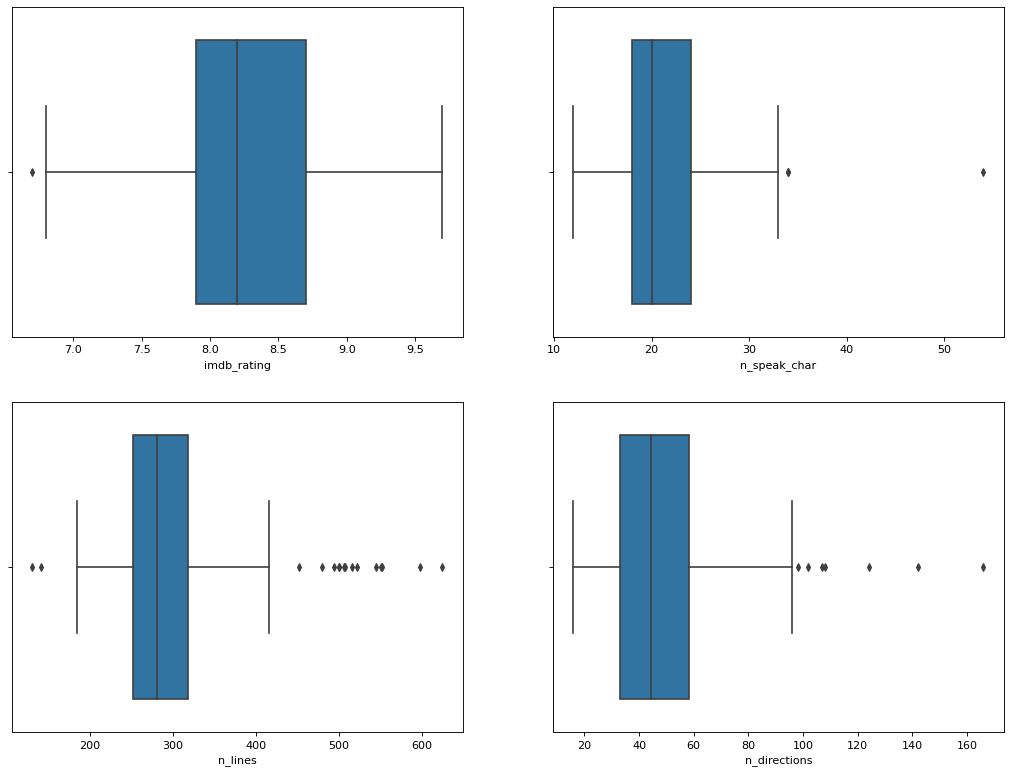

In [ ]:
# finding outliers

d_num = ['imdb_rating','n_lines',	'n_directions',	'n_speak_char']
fig, axs = plt.subplots(2, 2, figsize = (16,12))
r = 0
c = 0

for i in d_num:
  sns.boxplot(x = train_set[i], ax = axs[r,c] )

  if r>= 1:
     c += 1
  else:
    r += 1
  if c == 2 and r == 1:
    r = 0
    c = 1
  
def tukey_fences(df_tf, k):
  l_quantile, u_quantile = np.quantile(df_tf, q = [0.25, 0.75])
  IQR = u_quantile - l_quantile
  u_boundary = u_quantile + (IQR * k)
  l_boundary = l_quantile - (IQR * k)
  return l_boundary, u_boundary

# k = 1.5 (default value)
for i in d_num: 
  l_boundary, u_boundary = tukey_fences(train_set[i], 1.5)
  tf_1 = np.where(train_set[i] < l_boundary, 1, 0)
  tf_2 = np.where(train_set[i] > u_boundary, 1, 0)
  tf_sum = tf_1 + tf_2

from sklearn.preprocessing import FunctionTransformer
# function that set outliers to np.nan
def rm_outlier(X):
  X_train = np.transpose(np.empty(shape = np.shape(X)))
  for index,i in enumerate(X):
    low, up = tukey_fences(X[i], 1.5)
    mask1 = np.where(X[i] < low, np.nan, X[i])
    mask2 = np.where(X[i] > up, np.nan, 0)
    mask = mask1 + mask2
    X_train[index] = mask
  return X_train

transformer = FunctionTransformer(rm_outlier)

# apply outlier function to numerical columns (not to hot encoded ones)
X_outlier = transformer.transform(train_set[d_num])
train_set[d_num] = pd.DataFrame(np.transpose(X_outlier))

# drop rows with outliers
train_set = train_set.dropna()
train_set = train_set.reset_index(drop=True)


#the final train and test data set are train_set and test_set, split into X data and output data (y)
output = 'imdb_rating'
y_train = train_set.loc[:,output]
X_train = train_set.drop(output, axis=1)
y_test = test_set.loc[:,output]
X_test = test_set.drop(output, axis=1)


## **3. Model Fitting and Tuning**

Predicting the IMDB rating using features of the series is a supervised learning problem and hence, it wouldn't make sense to use methods outside the scope of regression. Additionally, as previously mentioned, to avoid dealing with a classification problem since our data is mostly continuous, we performed the one-hot encoding on the remaining categorical variables. Two regression models were used to determine which is better to accurately make predictions and draw conclusions from the data.

Subsequently, we will explore linear regression for our modelling method, and will choose between Lasso and Ridge regression. The main difference between Lasso and Ridge regression is that Lasso tends to make coefficients equal to absolute zero. In comparison Ridge regression never sets the value of a coefficient to absolute zero. Both these regression methods, when used, require an $\alpha$ parameter, which is called the regularisation or tuning parameter. This is needed to determine the fit and the root mean square error ($\text{RMSE}$), which shows how close our data is to the line of best fit. As it will be seen below, the model which satisfied all these conditions better was the Ridge regression. 



In [ ]:
# Helper functions
# [MLP Workshop 5]
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

def model_fit(m, X, y, plot = False):
    """Returns the root mean squared error of a fitted model based on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
        plt.show()
    
    return rmse

# Import functions to use 

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




We first have a look at the initial fit using linear regression of our dataframe without changing the dataset, this gives an $\text{RMSE}$ of $0.8053$. On the fit plot, only a few points are on the line. Additionally, the residual plot deviates a lot from zero and it is not an ideal result.

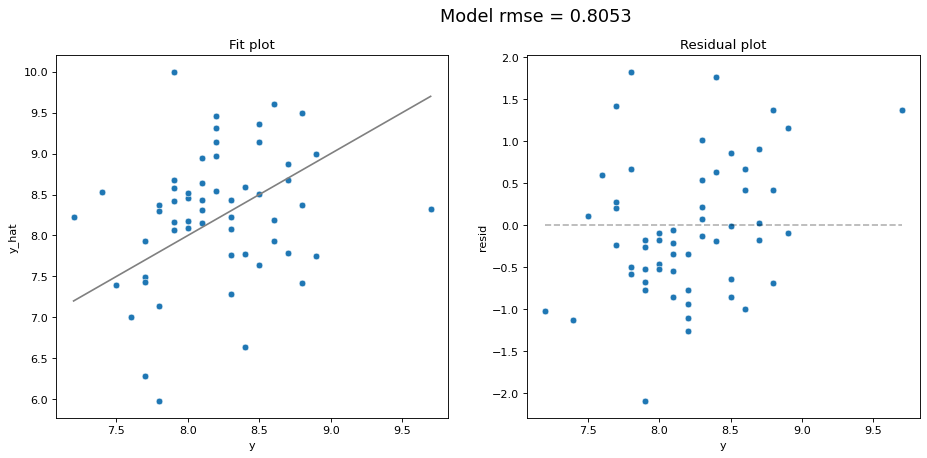

In [ ]:
X = X_train.copy()
X = X.drop(['principal component 1'], axis = 1)
#X = X.iloc[: , :116] # To not use the extra columns added before.

lm = LinearRegression().fit(X, y_train)   

X_test_matrix = X_test.copy()
X_test_matrix = X_test_matrix.drop(['principal component 1'], axis = 1)



model_fit(lm, X_test_matrix, y_test, plot=True);

#ideally we want the points on the left plot on the grey line and the residual to be 0

Following on, we used the standard approach, to standardize our data before fitting a linear regression model to avoid a huge range of $\beta$, where $\beta$'s are the estimated coefficients of the model. Thus we centered and scaled all the features to a common scale. We have used the typical scaling approach and subtracted the mean of each feature and then divided by its standard deviation, leading to columns with a mean of 0 and a variance of 1. We have achieved that using the StandardScaler transformer from the preprocessing submodule. As the data is standardised, the $\text{RMSE}$ drops significantly and a better fit is produced. Furthermore, to determine the $\alpha$, we have used the GridSearchCV function that calculates the best value for $\alpha$ that produces a good fit on the data but also has a relatively low $\text{RMSE}$. The $\text{RMSE}$ of Lasso was lower than the $\text{RMSE}$ of Ridge, but the latter had a better fit on the data. This can be seen in the plot below. We therefore decided to use Ridge regression rather than Lasso regression. Also, note that both the fit and the residual plot of the Ridge regression using this approach is better than the initial fit of the dataframe using simple linear regression.

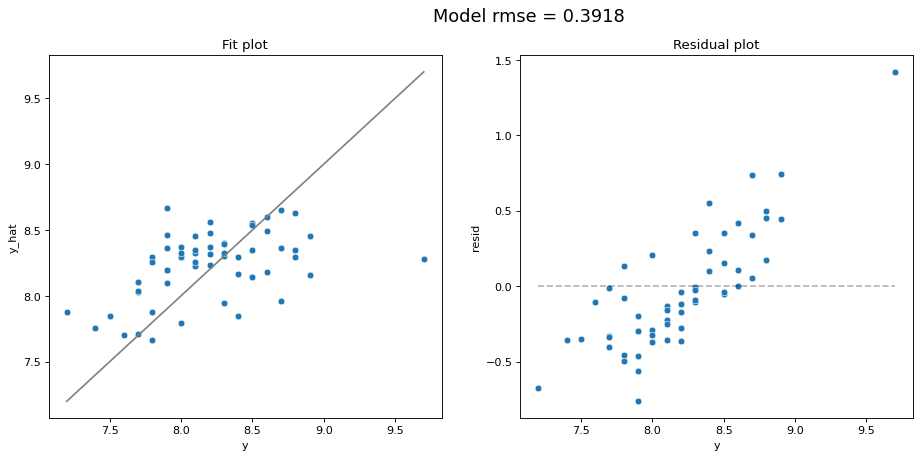

In [ ]:
#@title
from sklearn.linear_model import Ridge

## [MLP Workshop 1 6.1]
alphas = np.linspace(0, 200, num=200)
gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Ridge()
    ),
    param_grid={'ridge__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=1234),
    scoring="neg_root_mean_squared_error"
).fit(X, y_train)
model_fit(gs.best_estimator_, X_test_matrix, y_test, plot=True)


betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alphas:
    m = make_pipeline(
        StandardScaler(),
        Ridge(alpha=a)
    ).fit(X, y_train)
    
    betas.append((get_coefs(m)[1:]))
    rmses.append(model_fit(m, X_test_matrix, y_test))


res = pd.DataFrame(
    data = betas,
    columns = d_final[X.columns].columns, # Label columns w/ feature names
).assign(
    alpha = alphas,
    rmse = rmses
).melt(
    id_vars = ('alpha', 'rmse')
)


## **Principal Component analysis (PCA)** 

To use linear regression for the categorial variables we decided to use a principal component analysis to summarise the numerical features `n_lines`, `n_directions` and `n_speak_char` into one column. This is done by using the PCA-function from sklearn.decomposition-library. 

## **Performance of linear regression**

To check the performance of the linear regression we look at the $R^2$ value and the $\text{RMSE}$, defined as follows (*MLP Lecture 5*):

$$R^2 = 1- \frac{RSS}{TSS} \\
\text{RMSE} = \sqrt{\displaystyle\sum_{i=1}^{N} (y_i-\hat{y}_i)^2} $$ 
where $RSS= \displaystyle\sum_{i=1}^N (y_i - \hat{y}_i )^2$ and $TSS = \displaystyle\sum_{i=1}^N (y_i - \bar{y})^2$, with $y_i$ the real ratings, $\hat{y}_i$ the estimated rating, $\bar{y}$ the average rating and $N$ the number of considered episodes. 

Below we will show the performance of linear regression for the different categorial variables: directors, writers and main characters as well as if the show should have a cold open or not. 




### **Directors**
 

The table below shows the $\text{RMSE}$ and $R^2$-value for the test and training data of the directors. The table doesn't include all directors as some were dropped, this will be explained in the next section.

In [ ]:
final_directors = []

# drop directors who directed less than 4 episodes (on average directors directed 3.4 episodes)

for i in directors_corrected:
  if np.sum(d_new[i])>3:
    final_directors.append(i)

directors_rmse_train = []
directors_rmse_test = []
directors_r_value_train = []
directors_r_value_test = []
for i in final_directors:
  X = np.c_[np.ones(len(y_train)), X_train["principal component 1"], X_train[i]]
  l = LinearRegression(fit_intercept=False).fit(X, y_train)
  X_train[i+"_pred"] = l.predict(X)

  directors_rmse_train.append(model_fit(l,X,y_train))
  directors_rmse_test.append(model_fit(l,np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))
  directors_r_value_train.append(l.score(X,y_train))
  directors_r_value_test.append(l.score(np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))
  
directors_rmse = pd.DataFrame(np.transpose([final_directors,directors_rmse_train,directors_rmse_test,directors_r_value_train,directors_r_value_test]),columns = ['Director','RMSE train','RMSE test','R^2 train','R^2 test'])
directors_rmse

,Director,RMSE train,RMSE test,R^2 train,R^2 test
0,B.J. Novak_d,0.49585581803248996,0.4510183759984478,0.019493309115814372,-0.04032602738341717
1,Brent Forrester_d,0.49704804735598523,0.44779764923486914,0.014772605487816226,-0.025521120524832908
2,Charles McDougall_d,0.4994756992712135,0.4474088952501676,0.005125127342583635,-0.02374128819058896
3,David Rogers_d,0.48714173360496277,0.4477003508484534,0.053653000188600086,-0.025075514300398893
4,Greg Daniels_d,0.4887133123402669,0.43743881626795117,0.047537088708756725,0.02137653324627864
5,Harold Ramis_d,0.4894790724350705,0.4478609217742253,0.04454994069034324,-0.0258109474579018
6,Jeffrey Blitz_d,0.4983157518104211,0.44419058652710186,0.009740617531792117,-0.009066275006989866
7,Ken Kwapis_d,0.4983535967722116,0.45896311868980016,0.009590199844051406,-0.07729976773851255
8,Ken Whittingham_d,0.4951077718688916,0.47996164792654705,0.022449454798369572,-0.17813229732127112
9,Matt Sohn_d,0.4988331310500335,0.4365791090583591,0.007683264882299756,0.02521936967338989


By looking at the $\text{RMSE}$ we can see that the values for training data and for the test data are of the same order and are around 6% of the average rating. That seems to be an acceptable value for our dataset as we have a lot of different features which influence the rating. Looking at the $R^2$-values, we can see that they differ for the training and test set. An optimal fit would give $R^2 = 1$, for the training data we get values of $\mathcal{O}(10^{-2})$. Looking at the data it is not surprising that our fits are poor and therefore $R^2$ is small. For the test data, we even get negative $R^2$-values of order $\mathcal{O}(10^{-1})$. Nevertheless, we decided to go forward with this modelling approach as for our case, the main factor is not the quality of the fit, we only use it to see if the person has a positive or negative infuence on the rating. 

### **Writers**

For the writers, we followed the same approach to verify our model as for the directors. The following table shows the $\text{RMSE}$ and $R^2$-value for the train and test set for the different writers. 



In [ ]:
final_writers = []
# drop writers who have writted less than 6 episodes

for i in writers:
  if np.sum(d_new[i])>6:
    final_writers.append(i)
writer_rmse_train = []
writer_rmse_test = []
writer_r_value_train = []
writer_r_value_test = []

for index,i in enumerate(final_writers):
  X = np.c_[np.ones(len(y_train)), X_train["principal component 1"], X_train[i]]
  l = LinearRegression(fit_intercept=False).fit(X, y_train)

  X_train[i+"_pred"] = l.predict(X)
  writer_rmse_train.append(model_fit(l,X,y_train))
  writer_rmse_test.append(model_fit(l,np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))
  writer_r_value_train.append(l.score(X,y_train))
  writer_r_value_test.append(l.score(np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))
  

writer_rmse = pd.DataFrame(np.transpose([final_writers,writer_rmse_train,writer_rmse_test,writer_r_value_train,writer_r_value_test]),columns = ['Writer','RMSE train','RMSE test','R^2 train', 'R^2 test'])
writer_rmse

,Writer,RMSE train,RMSE test,R^2 train,R^2 test
0,B.J. Novak_w,0.49715895725714454,0.4447922275214352,0.014332874702068454,-0.011801617900934369
1,Brent Forrester_w,0.4994952669961673,0.44793703238228894,0.005047174324114945,-0.02615963485308148
2,Charlie Grandy_w,0.499460377617336,0.44747058760578395,0.005186162923202953,-0.024023631105897003
3,Gene Stupnitsky_w,0.4901353009376579,0.45379274643402323,0.04198634240032595,-0.05316420467032312
4,Greg Daniels_w,0.4993835659580999,0.4428336407926644,0.005492122831564528,-0.002910553658515447
5,Halsted Sullivan_w,0.49949528566087054,0.44798590796230725,0.005047099967055768,-0.02638358098811322
6,Jennifer Celotta_w,0.49803893686987005,0.4442910081808924,0.010840492277893743,-0.009522581654030748
7,Justin Spitzer_w,0.49949762689977406,0.4483170293030291,0.005037772840402632,-0.02790141046178163
8,Lee Eisenberg_w,0.4901353009376579,0.45379274643402323,0.04198634240032595,-0.05316420467032312
9,Michael Schur_w,0.497058319827533,0.43578944678362186,0.014731881758936027,0.028742448692688494


Looking at this table, we can see that the values for $\text{RMSE}$ and $R^2$ values for both, the test and training data are similar to the ones of the directors. Using the same arguments as before, we decided to also use this model for the decision if a writer should be considered or not. This will be explained in the next section where the results of the model are presented.

### **Main characters**

To check if the chosen approach is reasonable, we again looked at the $\text{RMSE}$ and $R^2$-value for the different characters, shown in the table below.

In [ ]:
char_rmse_train = []
char_rmse_test = []
char_r_value_train = []
char_r_value_test = []

for i in main_characters:
  X = np.c_[np.ones(len(y_train)), X_train["principal component 1"], X_train[i]]
  l = LinearRegression(fit_intercept=False).fit(X, y_train)
  X_train[i+"_pred"] = l.predict(X)

  char_rmse_train.append(model_fit(l,X,y_train))
  char_rmse_test.append(model_fit(l,np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))
  char_r_value_train.append(l.score(X,y_train))
  char_r_value_test.append(l.score(np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))

char_rmse = pd.DataFrame(np.transpose([main_characters,char_rmse_train,char_rmse_test,char_r_value_train,char_r_value_test]),columns = ['Character','RMSE train','RMSE test','R^2 train','R^2 test'])
char_rmse

,Character,RMSE train,RMSE test,R^2 train,R^2 test
0,Andy,0.4983862092196001,0.44620606090950354,0.009460570020722203,-0.018244142619563197
1,Angela,0.4970994516019948,0.45021209069335727,0.014568812351699933,-0.03660977158455503
2,Creed,0.4994973240002899,0.44820383529856817,0.0050389795466522225,-0.027382413499602576
3,Darryl,0.47384701079472347,0.4478125084968364,0.10460219476138866,-0.025589181354710444
4,Dwight,0.5027021930038224,0.4513666623038144,-0.007769695471082416,-0.041933373016520115
5,Erin,0.4269522842598255,0.4033741022357539,0.27306024905340665,0.16785882077706182
6,Jim,0.5027021930038224,0.4513666623038144,-0.007769695471082416,-0.041933373016520115
7,Kelly,0.4824513662867551,0.4272856388869707,0.07178877465083922,0.06627801833655034
8,Kevin,0.4970045809641219,0.4453748445524722,0.014944912401646082,-0.014453997576926447
9,Meredith,0.4899319234207136,0.45808919227742834,0.042781216857332716,-0.07320103156155322


We have a similar order for the $\text{RMSE}$ and $R^2$-value of the characters compared to writers and directors. Therefore, the same arguments as before are valid for the modelling of the rating for the different main characters.  

### **Cold Opens**

This subsections shows the results of the validation for the cold opens by looking at the $\text{RMSE}$ and $R^2$-value. 

In [ ]:
i='cold_opens'
X = np.c_[np.ones(len(y_train)), X_train["principal component 1"], X_train[i]]
l = LinearRegression(fit_intercept=False).fit(X, y_train)
X_train[i+"_pred"] = l.predict(X)

cold_rmse_train = model_fit(l,X,y_train)
cold_rmse_test = model_fit(l,np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test)
cold_r_value_train = l.score(X,y_train)
cold_r_value_test = l.score(np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test)

cold_rmse = pd.DataFrame(np.transpose([[i,1],[cold_rmse_train,1],[cold_rmse_test,1],[cold_r_value_train,1],[cold_r_value_test,1]]),columns = ['Cold Open','RMSE train','RMSE test','R^2 train','R^2 test'])
cold_rmse.head(1)

,Cold Open,RMSE train,RMSE test,R^2 train,R^2 test
0,cold_opens,0.4994921243790841,0.44845031876953845,0.005059693945891008,-0.02851271357411922


The results of the validation remain of the same order as of the other categorial variables and therefore we use the same arguments as a reason to use this modelling approach.

In general, linear regression doesn't give the best fit for the data but we still decided to go forward with it as our conclusion relies more on the difference between two fits for a categorial variable than on the actual fit.

## **4. Discussion & Conclusions**


Through our modelling we can make suggestions on how the "The US Office: Reunion Show" could be produced to attain the best viewer rating. This will be done by giving recommendations on potential directors, writers and main characters for the show. We conducted modelling on the number of speaking characters and cold opens. Which will form guidance to both the writer and director rather than a definite undertaking in production.
 
From the dataset provided, we decided variables which were included in our model based on factors that could be adjusted. These are: 
* `n_lines`
* `n_directions`
* `n_speak_char`
* `cold_opens`
* directors 
* writers 
* main characters

After the preparation of the data, we used different methods of regression to make estimates on ratings from our set of variables. Regression aims to predict the rating as a function of explanatory variables, by finding the best fit of the data. We incorporated principal component analysis *(PCA)* to our regression. This method summarised the variables `n_lines`, `n_directions` and `n_speak_char` into a single feature. The principal component was used to form our regression model for each director, writer and main character. The following subsections will show the results from our model and recommend  our choice of director, writer and main characters. 
 
###**Directors**


We calculated the average of how many episodes a director produced. Directors that produced less than the average of 6 episodes were dropped. This was to ensure that our selection of director would be one with a certain level of contribution and exposure to the show and its rating. To determine whether specific directors led to higher ratings we used linear regression with categorical variables. 

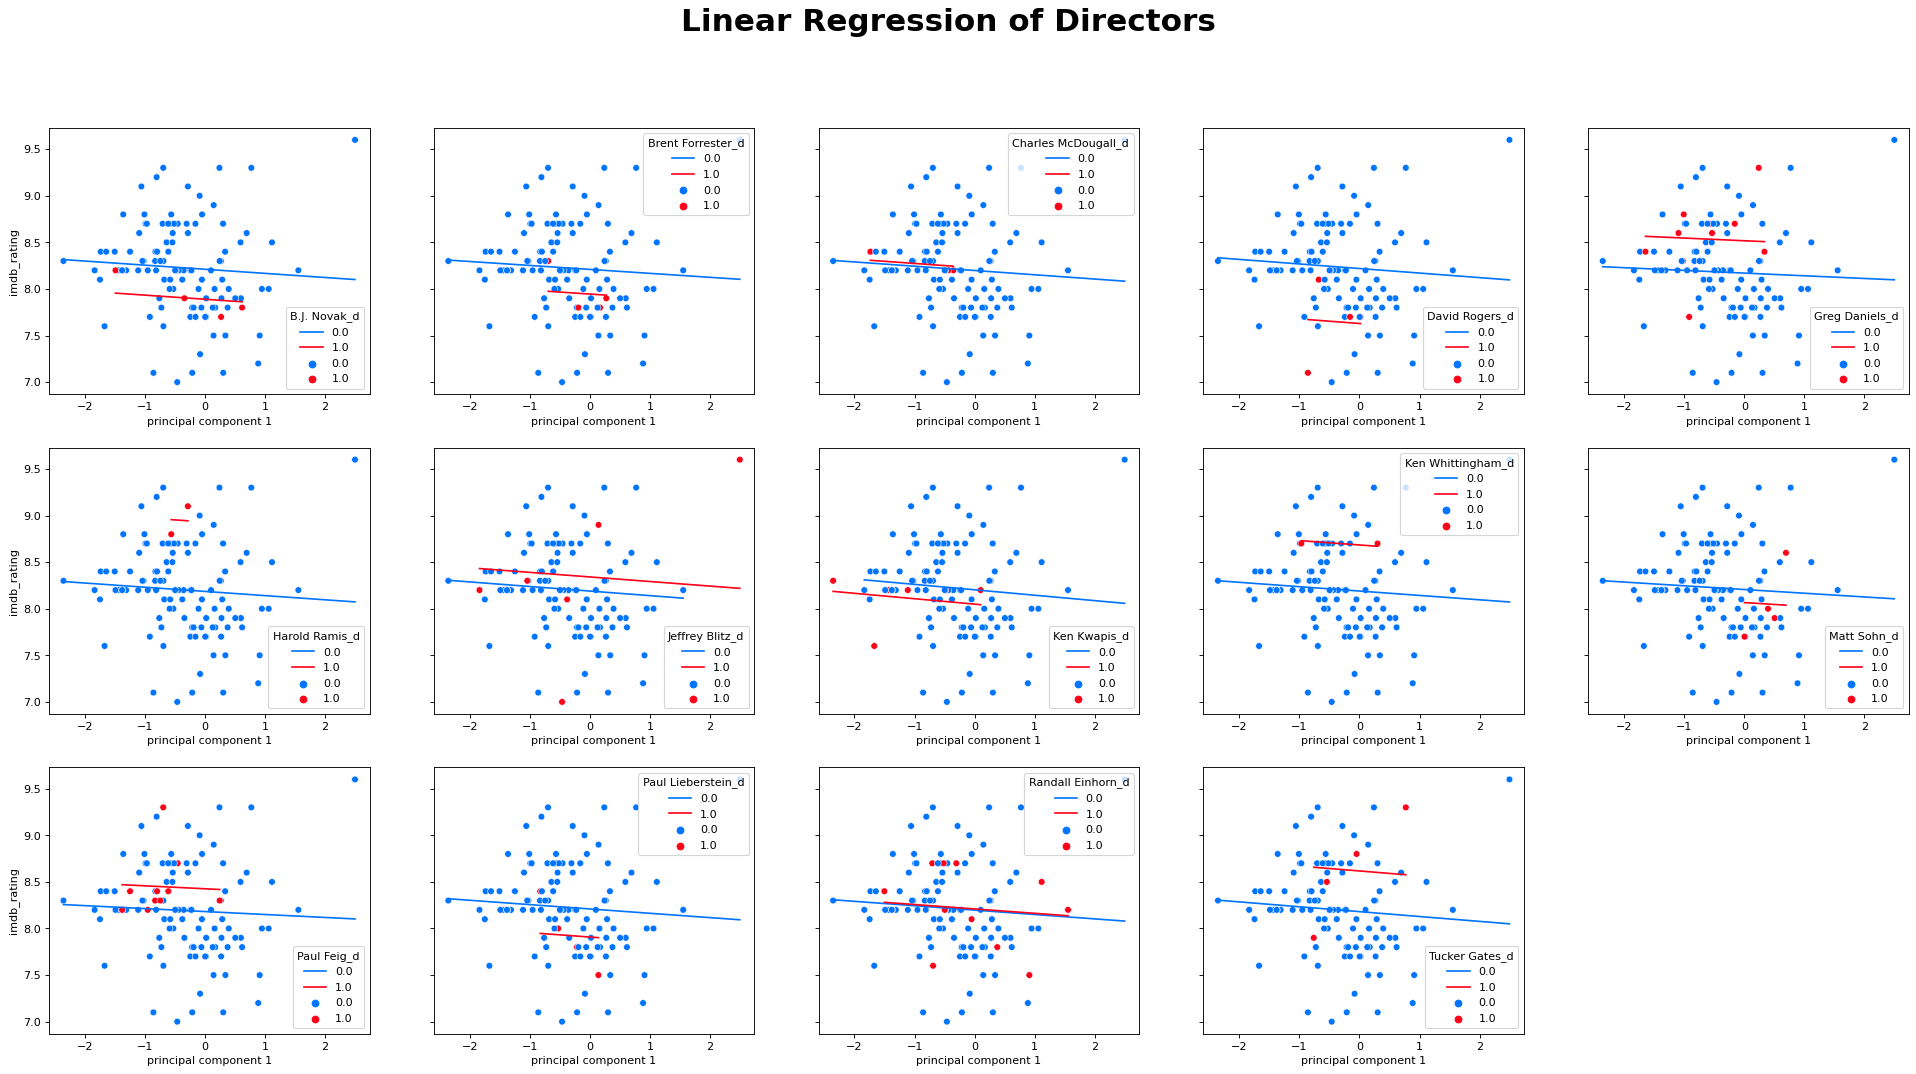

In [ ]:
# Directors
r,c = 0,0
fig, axs = plt.subplots(3,5, sharey = True,figsize=[30,15])
fig.suptitle("Linear Regression of Directors", fontsize=28, fontweight='bold')
for i in final_directors:
  sns.scatterplot(x="principal component 1", y=y_train, hue=i, data=X_train,ax = axs[r,c],palette ='hsv', hue_norm=(-1.5,1))
  sns.lineplot(x="principal component 1", y=i+"_pred", hue=i, data=X_train,ax = axs[r,c],palette ='hsv', hue_norm=(-1.5,1))
  if c<4:
    c+=1
  else:
    c = 0
    r+=1

fig.delaxes(axs[2][4])

The plots above show the results of the linear regression, where on the $x$-axis we have the principal component and on the $y$-axis the rating. The colors indicated if the person directed a epsiode (red) or not (blue). The data is presented by dots and the fits as lines. From these plots we wanted to obtain what effect of the inclusion or exclusion of a writer in an epsiode on average is. Simply speaking, if the red line is above the blue line, including a director could lead to a higher rating. From this analysis we can shrink the set of potential directors even further to: Charles McDougall, Harold Ramis, Ken Whittingham, Paul Feig, Randall Einhorn and Tucker Gates.

To determine who has the highest (positive) effect on the rating, we used Ridge Regression.

Text(0.5, 0.98, 'Ridge Regression for Directors')

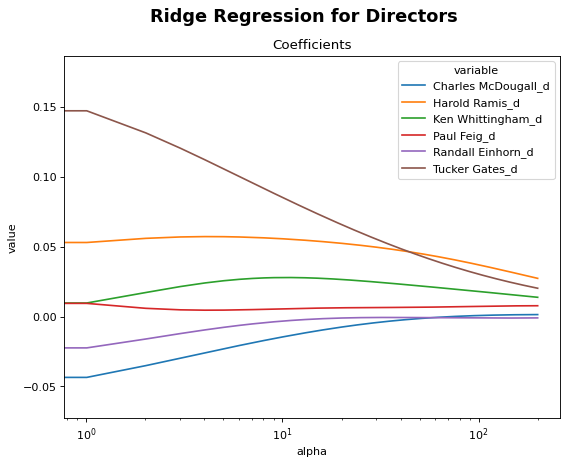

In [ ]:
# ridge regression - directors
# [MLP Workshop 5 Ex 5.2]

res_new = res[(res["variable"].isin(("Charles McDougall_d","Harold Ramis_d", "Ken Whittingham_d", "Paul Feig_d", "Randall Einhorn_d", "Tucker Gates_d")))]
plt.figure(figsize=[8,6])
sns.lineplot(x='alpha', y='value', hue='variable', data=res_new).set_title("Coefficients")
plt.xscale('log')
plt.suptitle("Ridge Regression for Directors", fontsize=16, fontweight='bold')

The plot above shows the influence on the rating of a given director. We can't tell from this plot if the influence is positive or negative, we estimated this in the previous step. The influence is the highest for Tucker Gates, therefore including him would potentially lead to the highest increase in the rating. Based on this, we would suggest to hire either Tucker Gates or Harold Ramis.

###**Writers**

For the writers, we used the same approach as directors. To ensure that we can relate the rating with a writer, individuals who had written less than the average of 4 episodes were dropped from the dataset. Using again linear regression for categorial variables where we used the PCA component as training data, we get the following plots. The only information we want to get from these models is if the rating is better if the individual has written the episode.


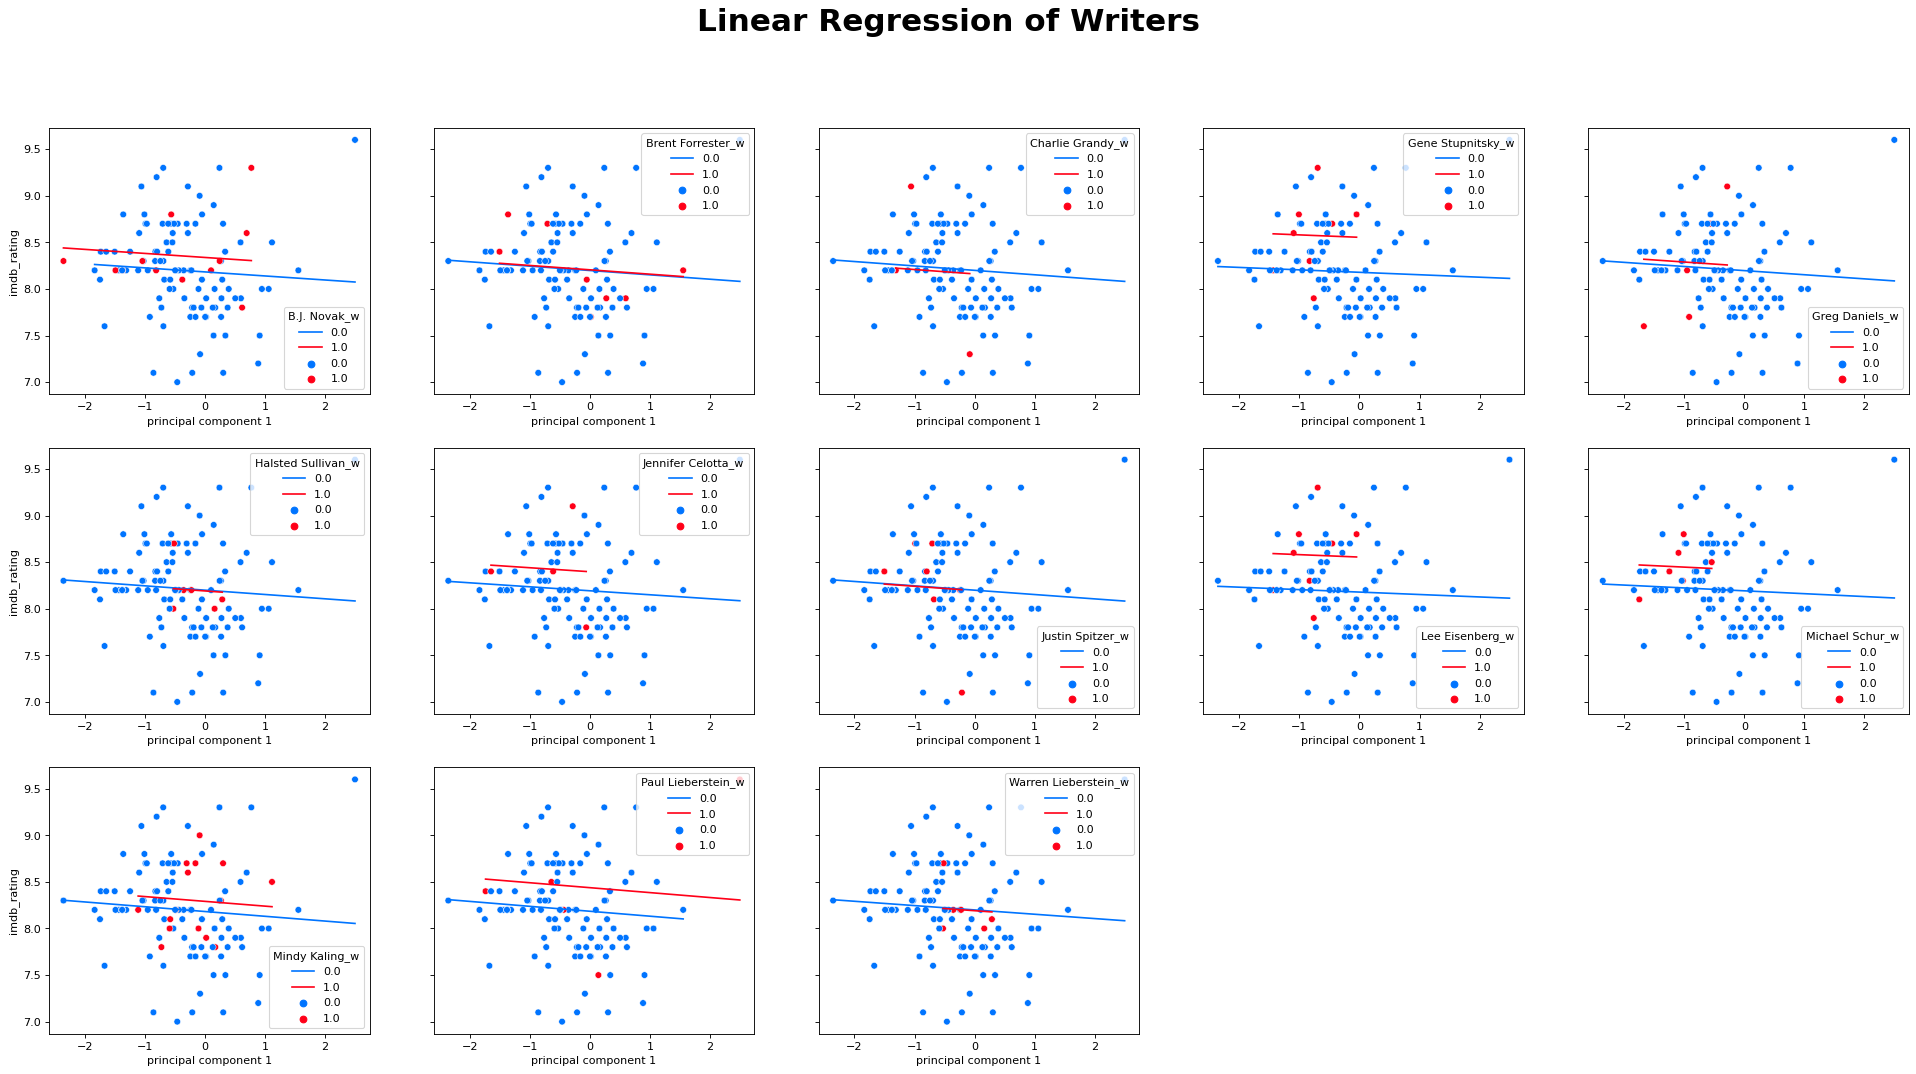

In [ ]:
# Writers
r,c = 0,0
fig, axs = plt.subplots(3,5,figsize=[30,15], sharey = True)
fig.suptitle("Linear Regression of Writers", fontsize=28, fontweight='bold')
for index,i in enumerate(final_writers):
  sns.scatterplot(x="principal component 1", y=y_train, hue=i, data=X_train, ax = axs[r,c],palette ='hsv', hue_norm=(-1.5,1))
  sns.lineplot(x="principal component 1", y=i+"_pred", hue=i, data=X_train, ax = axs[r,c],palette ='hsv', hue_norm=(-1.5,1))
  if c<4:
    c+=1
  else:
    c = 0
    r+=1
fig.delaxes(axs[2][4])
fig.delaxes(axs[2][3])

The above plot used the same labelling as the previous plot for the directors. Writers that should be consider to be included are: B.J. Novak, Brent Forrester, Gene Stupnitsky, Halsted Sullivan, Jennifer Celotta, Lee Eisenberg, Mindy Kaling and Warren Lieberstein.

The following plot shows the estimated the influence of the writer on the rating.

Text(0.5, 0.98, 'Ridge Regression for Writers')

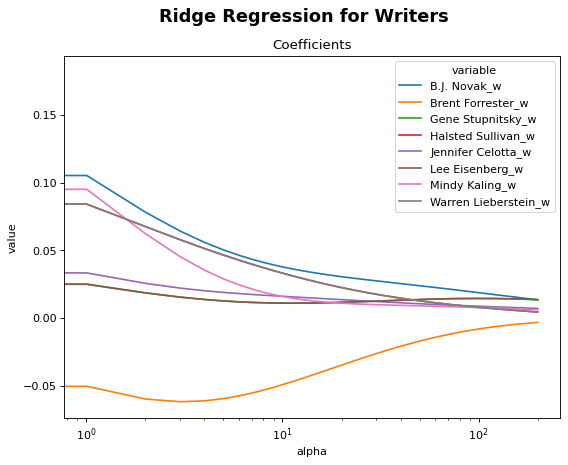

In [ ]:
# ridge regression - writers
res_new_w = res[(res["variable"].isin(("B.J. Novak_w", "Brent Forrester_w", "Gene Stupnitsky_w","Halsted Sullivan_w", "Jennifer Celotta_w", "Lee Eisenberg_w", "Mindy Kaling_w", "Warren Lieberstein_w")))]

plt.figure(figsize= [8,6])
sns.lineplot(x='alpha', y='value', hue='variable',data=res_new_w).set_title("Coefficients")
plt.xscale('log') # makes it easier to see the influence
plt.suptitle("Ridge Regression for Writers", fontsize=16, fontweight='bold')

This plot shows that Mindy Kaling, B.J. Novak and Lee Eisenberg have the highest influence and we therefore suggest to hire one of them as a writer.

###**Main Characters**

To find out which main character to include we began with linear regression to see if the rating on average was higher when the character was part of an epsiode or not. The plot suggests that Dwight, Jim, Kelly, Michael, Pam and Ryan should be included in the epsisodes. On the other hand episodes where Andy, Angela, Creed, Darryl, Erin, Kevin, Meredith, Oscar, Phyllis, Stanley and Toby are shown, the rating is lower than in ones where there are not shown. To see the effects of including a character on the rating, we used again ridge regression. 

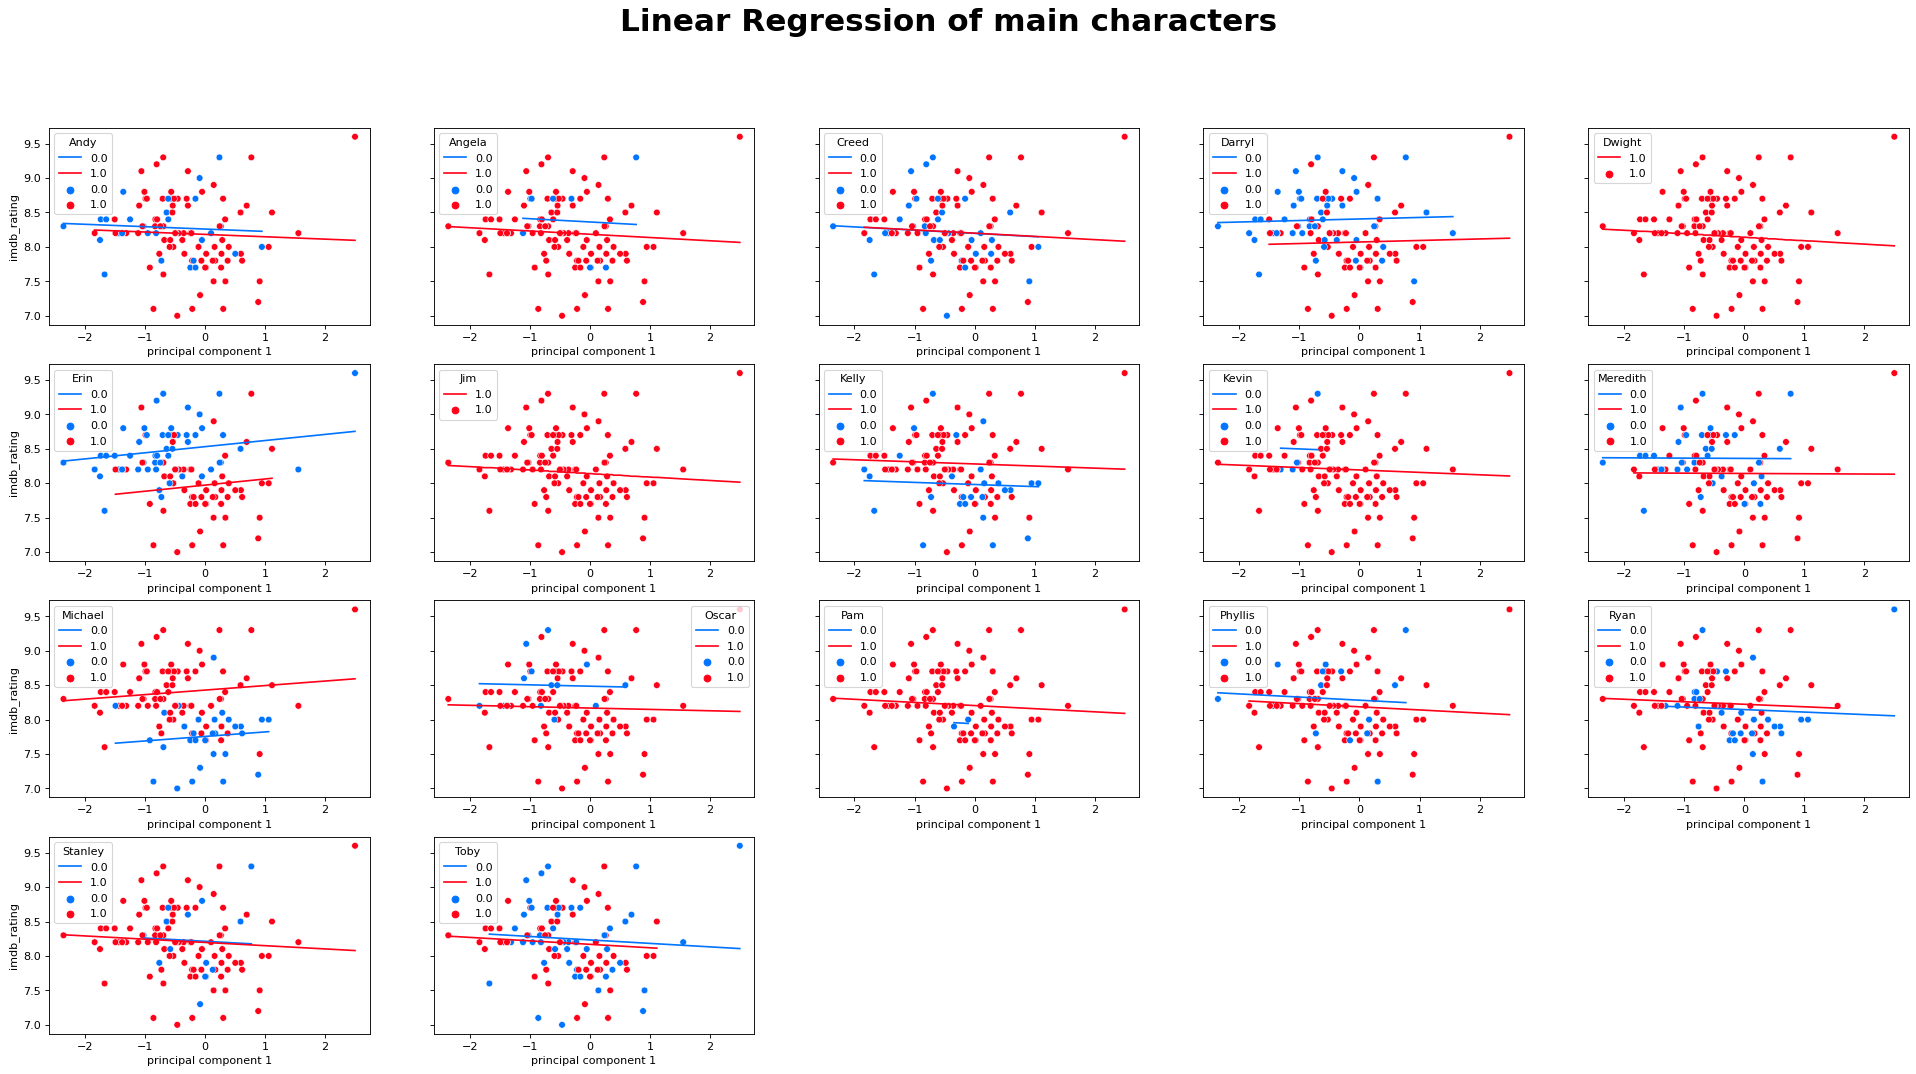

In [ ]:
# Main Characters
r,c = 0,0
fig, axs = plt.subplots(4,5,figsize=[30,15], sharey = True)
for i in main_characters:
  sns.scatterplot(x="principal component 1", y=y_train, hue=i, data=X_train,ax =axs[r,c],palette ='hsv', hue_norm=(-1.5,1))
  fig.suptitle("Linear Regression of main characters", fontsize=28, fontweight='bold')
  sns.lineplot(x="principal component 1", y=i+"_pred", hue=i, data=X_train,ax = axs[r,c],palette ='hsv', hue_norm=(-1.5,1))
  if c<4:
    c+=1
  else:
    c = 0
    r+=1

fig.delaxes(axs[3][4])
fig.delaxes(axs[3][3])
fig.delaxes(axs[3][2])

Text(0.5, 0.98, 'Ridge Regression for Main Characters')

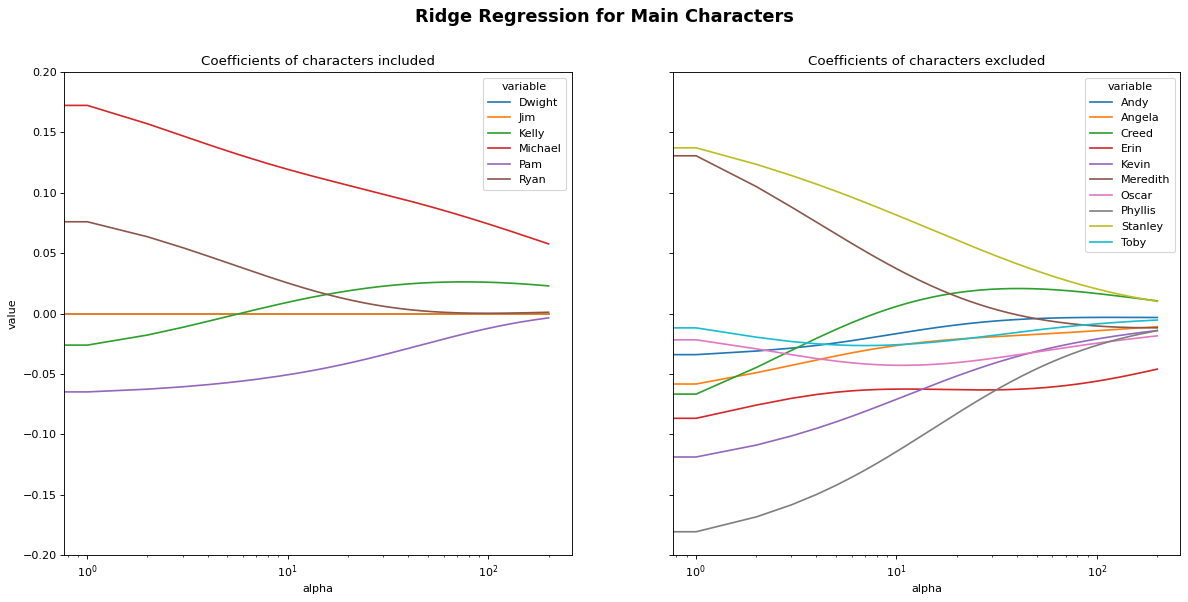

In [ ]:
# ridge regression - main characters
res_include = res[(res["variable"].isin(("Dwight", "Jim", "Kelly", "Michael", "Pam", "Ryan")))]
res_exclude = res[(res["variable"].isin(("Andy", "Angela", "Creed", "Darrly", "Erin", "Kevin", "Meredith", "Oscar", "Phyllis", "Stanley", "Toby")))]
fig, axs = plt.subplots(1,2,  sharex = True, sharey = True, figsize=(18,8))

sns.lineplot(x='alpha', y='value', hue='variable', data=res_include, ax = axs[0]).set_title("Coefficients of characters included")
plt.ylim(-0.20, 0.20)
#plt.xscale('log')


sns.lineplot(x='alpha', y='value', hue='variable', data=res_exclude, ax = axs[1]).set_title("Coefficients of characters excluded")
#plt.ylim(-0.20, 0.20)
plt.xscale('log')
fig.suptitle("Ridge Regression for Main Characters", fontsize=16, fontweight='bold')


From the above plot, we would recommend to definetly include Michael, Ryan and Pam. Dwight and Jim should also be included as they were included in all the episodes and therefore don't have an effect on the rating. Including Kelly would probably still lead to a higher rating but the influence is not as big on the rating. For the same reason, Andy, Angela, Creed, Oscar and Toby could still be included if they're needed for a storyline while Kevin, Stanley, Meredith, Erin and Phyllis should not be included as they have a negative influence on the rating (plot about linear regression) and the influence on the rating is comparably higher

###**Cold Opens**

We also conducted a linear regression with categorial variables if a cold open shoud be used. The plot below would suggest to not use a cold open. However, the sample size of episodes without cold opens is signifcantly smaller than with. This restricts how well our linear regression analysis can be. The use of a cold open should be left to the discretion of the writer and director to decide.

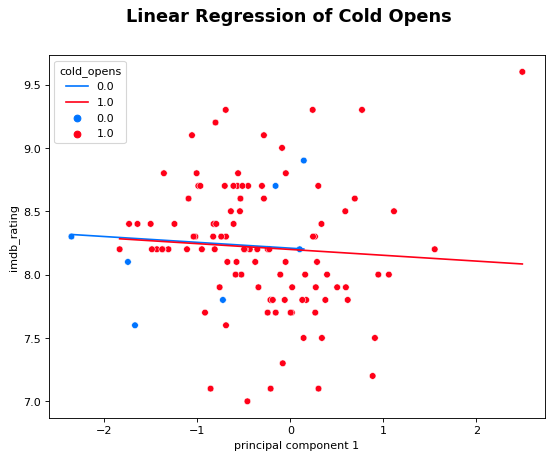

In [ ]:
fig, axs = plt.subplots(figsize=[8,6])
fig.suptitle("Linear Regression of Cold Opens", fontsize=16, fontweight='bold')
sns.scatterplot(x="principal component 1", y=y_train, hue="cold_opens", data=X_train ,ax = axs,palette ='hsv', hue_norm=(-1.5,1))
sns.lineplot(x="principal component 1", y="cold_opens_pred", hue="cold_opens", data=X_train, ax = axs, palette ='hsv', hue_norm=(-1.5,1))


###**Influence of other features on rating**


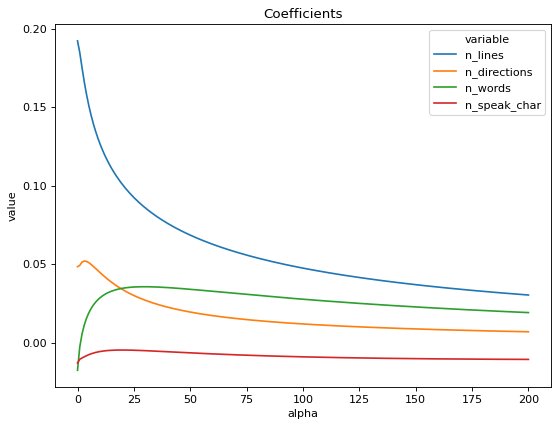

In [ ]:
# Other Variables
plt.figure(figsize = [8,6])
sns.lineplot(x='alpha', y='value', hue='variable', data=res[0:800]).set_title("Coefficients")
plt.show()

In general, we decided against giving advice on how many lines, directions, and speaking characters should be used as we assume this will be determined by the style of writing and direction. Instead, we offer our analysis above which shows that the number of lines has a high influence on rating. Therefore, this should be carefully considered by the diretor and writer during the production of the reunion show.

###**Conclusions**
We believe that our selection of directors, writers and characters will attain the best possible IMDb rating for the reunion show. Our additional research on cold opens was deemed to be restricted by the limited amount of episodes which didn't feature such introductions to the show. 
The choice of director and writer should provide the main structuring of the show. We believe that they should be given the creative freedom in the production. Utilising our analysis, they should adjust the features from the number of lines to stage directions. 
At last, a summary of our recommendations for directors, writers and characters can be seen below.

In [ ]:
Directors_rec = ["Tucker Gates","Harold Ramis","-","-","-"]
Writers_rec = ["Mindy Kaling", "B.J. Novak", "Lee Eisenberg","-","-"]
Main_chars_rec = ["Michael", "Ryan", "Pam", "Dwight", "Jim"]


recs = pd.DataFrame(index=["","","","",""])
recs['Directors'] = Directors_rec
recs['Writers'] = Writers_rec
recs['Main characters'] = Main_chars_rec

recs

,Directors,Writers,Main characters
,Tucker Gates,Mindy Kaling,Michael
,Harold Ramis,B.J. Novak,Ryan
,-,Lee Eisenberg,Pam
,-,-,Dwight
,-,-,Jim
